In [8]:
pip install tensorflow==2.8.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Constants
IMAGE_SIZE = 150
mpox_model_class_names = ['Mpox', 'Normal', 'Other']
mpox_model_WEIGHTS_PATH = "/content/models/Mpox_weights.h5"

def create_mpox_model():
  mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(150,150,3))

  for layer in mobilenet.layers:
    layer.trainable = False

  model = Sequential()
  model.add(mobilenet)
  model.add(Dense(128,activation="relu"))
  model.add(Flatten())
  model.add(Dense(3,activation = "softmax"))

  return model

mpox_model = create_mpox_model()
mpox_model.load_weights(mpox_model_WEIGHTS_PATH)

def mpox_predict(image_path, model, model_class_names, IMAGE_SIZE):
    # Load the image
    img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    image_np_resized_normalized = np.vstack([img_batch]) / 255.0  # Normalize to [0,1]

    # Predict probabilities
    probabilities = model.predict(image_np_resized_normalized)

    # Get the class with the highest probability
    class_index = np.argmax(probabilities)
    class_label = model_class_names[class_index]

    # Get the confidence score as a percentage
    confidence_score = np.max(probabilities) * 100
    confidence_score = round(confidence_score, 2)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {class_label}\nConfidence score: {confidence_score}%")
    plt.show()

    return class_label, confidence_score

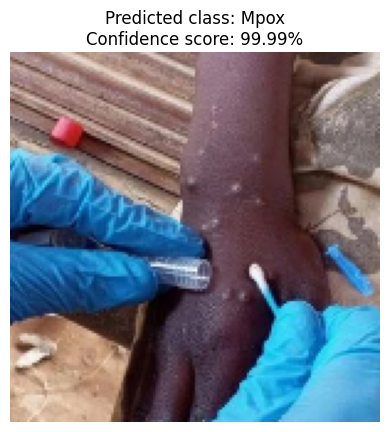

('Mpox', 99.99)

In [6]:
image_path = '/content/test/17.png'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)

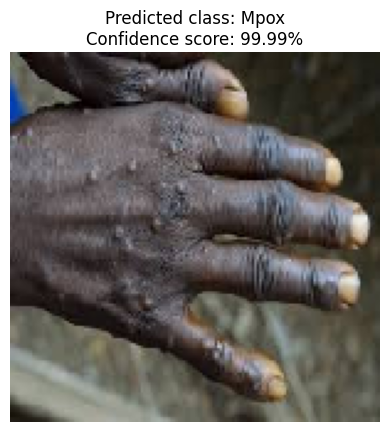

('Mpox', 99.99)

In [7]:
image_path = '/content/test/thumbnail_images.jpg'
mpox_predict(image_path, mpox_model, mpox_model_class_names, IMAGE_SIZE)